In [35]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [36]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 5]})

In [38]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,8)
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.express as px
plt.style.use('fivethirtyeight')
from prophet.plot import add_changepoints_to_plot
%matplotlib inline

In [39]:
ticker = ['NVDA']
start = datetime.datetime(2019,7, 19)
end = datetime.datetime(2023, 7, 19)
df = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [40]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-19,42.930000,42.994999,42.049999,42.110001,41.880844,34489600
2019-07-22,42.325001,42.959999,42.250000,42.830002,42.596928,31594000
2019-07-23,43.224998,43.935001,43.067501,43.915001,43.676018,42817600
2019-07-24,44.349998,44.722500,43.584999,44.665001,44.421944,36623600
2019-07-25,44.247501,44.375000,43.110001,43.345001,43.109127,39270000
...,...,...,...,...,...,...
2023-07-12,430.329987,439.350006,427.769989,439.019989,439.019989,48127700
2023-07-13,445.179993,461.549988,444.920013,459.769989,459.769989,47820400
2023-07-14,465.829987,480.880005,450.600006,454.690002,454.690002,77066400


In [41]:
df.head().dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-19,42.930000,42.994999,42.049999,42.110001,41.880844,34489600
2019-07-22,42.325001,42.959999,42.250000,42.830002,42.596928,31594000
2019-07-23,43.224998,43.935001,43.067501,43.915001,43.676018,42817600
2019-07-24,44.349998,44.722500,43.584999,44.665001,44.421944,36623600
2019-07-25,44.247501,44.375000,43.110001,43.345001,43.109127,39270000


In [42]:
df.tail().dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-12,430.329987,439.350006,427.769989,439.019989,439.019989,48127700
2023-07-13,445.179993,461.549988,444.920013,459.769989,459.769989,47820400
2023-07-14,465.829987,480.880005,450.600006,454.690002,454.690002,77066400
2023-07-17,462.890015,464.959991,452.619995,464.609985,464.609985,51048800
2023-07-18,467.010010,478.959991,457.339996,474.940002,474.940002,57019000


In [43]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [44]:
df['Adj Close'].iplot()

In [45]:
fig_price=px.line(df['Adj Close'], title='Price of NVDA')
fig_price.show()

In [46]:
df.reset_index(inplace=True)
df=df[['Date', 'Adj Close']]

In [47]:
df

,Date,Adj Close
0,2019-07-19,41.880844
1,2019-07-22,42.596928
2,2019-07-23,43.676018
3,2019-07-24,44.421944
4,2019-07-25,43.109127
...,...,...
1001,2023-07-12,439.019989
1002,2023-07-13,459.769989
1003,2023-07-14,454.690002
1004,2023-07-17,464.609985


In [48]:
#We rename the columns 

df.columns=['ds', 'y']

In [49]:
df

,ds,y
0,2019-07-19,41.880844
1,2019-07-22,42.596928
2,2019-07-23,43.676018
3,2019-07-24,44.421944
4,2019-07-25,43.109127
...,...,...
1001,2023-07-12,439.019989
1002,2023-07-13,459.769989
1003,2023-07-14,454.690002
1004,2023-07-17,464.609985


We create the model and fit it to the data

In [50]:
model=Prophet()

In [51]:
model.fit(df)

19:03:05 - cmdstanpy - INFO - Chain [1] start processing
19:03:06 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [53]:
df.tail()

,ds,y
1001,2023-07-12,439.019989
1002,2023-07-13,459.769989
1003,2023-07-14,454.690002
1004,2023-07-17,464.609985
1005,2023-07-18,474.940002


In [54]:
future_dates= model.make_future_dataframe(periods=365)

In [55]:
future_dates.tail()

,ds
1366,2024-07-13
1367,2024-07-14
1368,2024-07-15
1369,2024-07-16
1370,2024-07-17


In [56]:
prediction=model.predict(future_dates)

In [57]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1366,2024-07-13,796.252628,675.386237,969.819656,647.041754,938.340448,31.222678,31.222678,31.222678,13.434908,13.434908,13.434908,17.787770,17.787770,17.787770,0.0,0.0,0.0,827.475306
1367,2024-07-14,797.317843,680.320443,972.800545,647.723338,940.373473,31.739685,31.739685,31.739685,13.434895,13.434895,13.434895,18.304789,18.304789,18.304789,0.0,0.0,0.0,829.057528
1368,2024-07-15,798.383059,662.132484,960.881482,647.844138,942.828757,13.283699,13.283699,13.283699,-5.486060,-5.486060,-5.486060,18.769760,18.769760,18.769760,0.0,0.0,0.0,811.666758
1369,2024-07-16,799.448275,660.326326,959.332689,648.094634,944.631329,13.619175,13.619175,13.619175,-5.560625,-5.560625,-5.560625,19.179800,19.179800,19.179800,0.0,0.0,0.0,813.067450
1370,2024-07-17,800.513490,664.042488,958.882679,648.810812,946.254079,13.783990,13.783990,13.783990,-5.749825,-5.749825,-5.749825,19.533815,19.533815,19.533815,0.0,0.0,0.0,814.297480


We forecast NVDA prices and plot the results

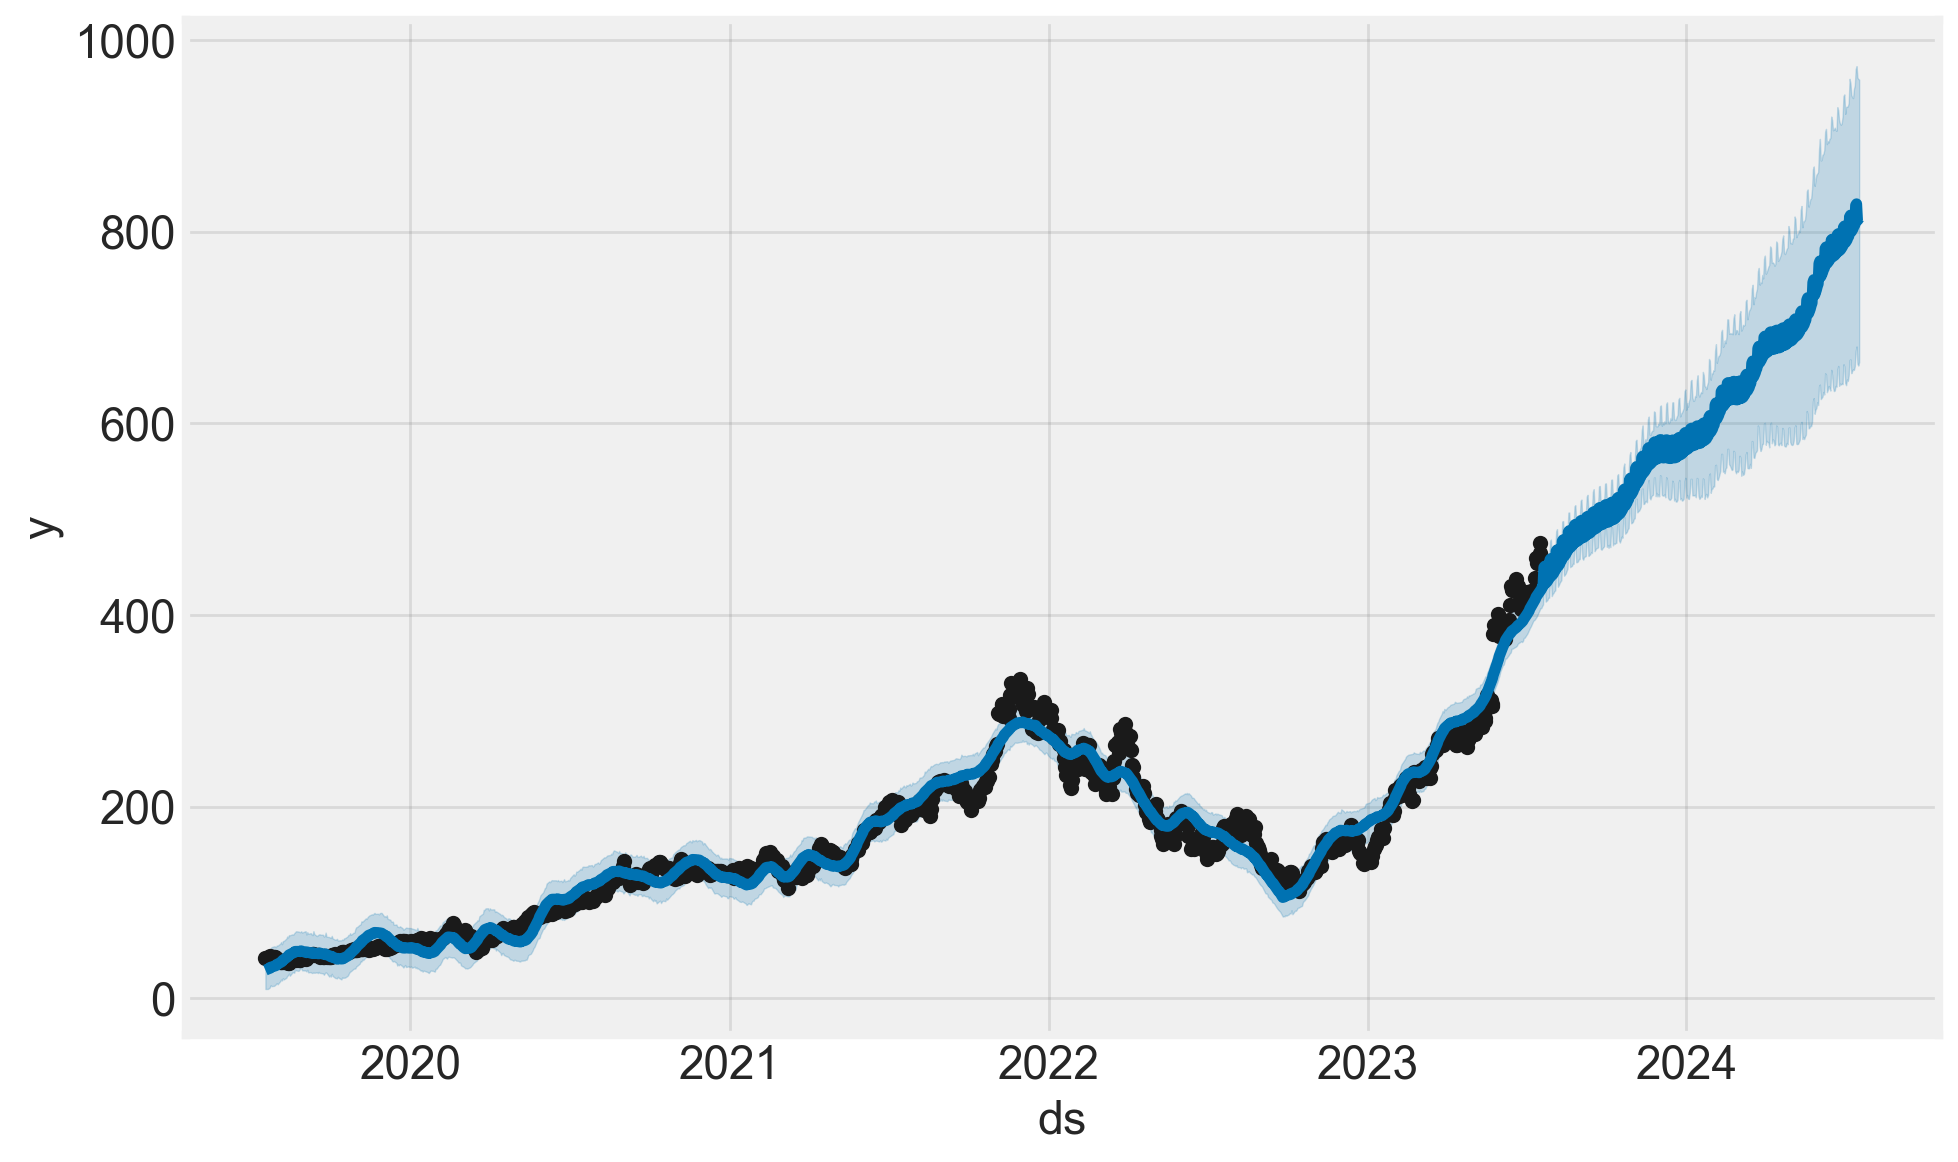

In [58]:
fig=model.plot(prediction)

The black dots are the actual observations of NVDA price.

• The blue line representing the fit does not match the observations exactly, as the model
smooths out the noise in the data (also reducing the chance of overfitting).
• Prophet attempts to quantify uncertainty, which is represented by the light blue intervals
around the fitted line. The interval is calculated assuming that the average
frequency and magnitude of trend changes in the future will be the same as in the
historical data.

We create an interactive plot and get the monthly predictions 

In [59]:
from prophet.plot import plot_plotly
plot_plotly(model, prediction)

We create an interactive plot and get the daily predictions 

In [60]:
from prophet.plot import plot_plotly
plot_plotly(model, prediction)

As Prophet is an additive model, we can sum up all the components to arrive at the final
forecast. Hence, we can look at those values as a type of feature importance, which
can be used to explain the forecast.

• We could also use the Prophet model to obtain those component values and then feed
them to another model (for example, a tree-based model) as features.

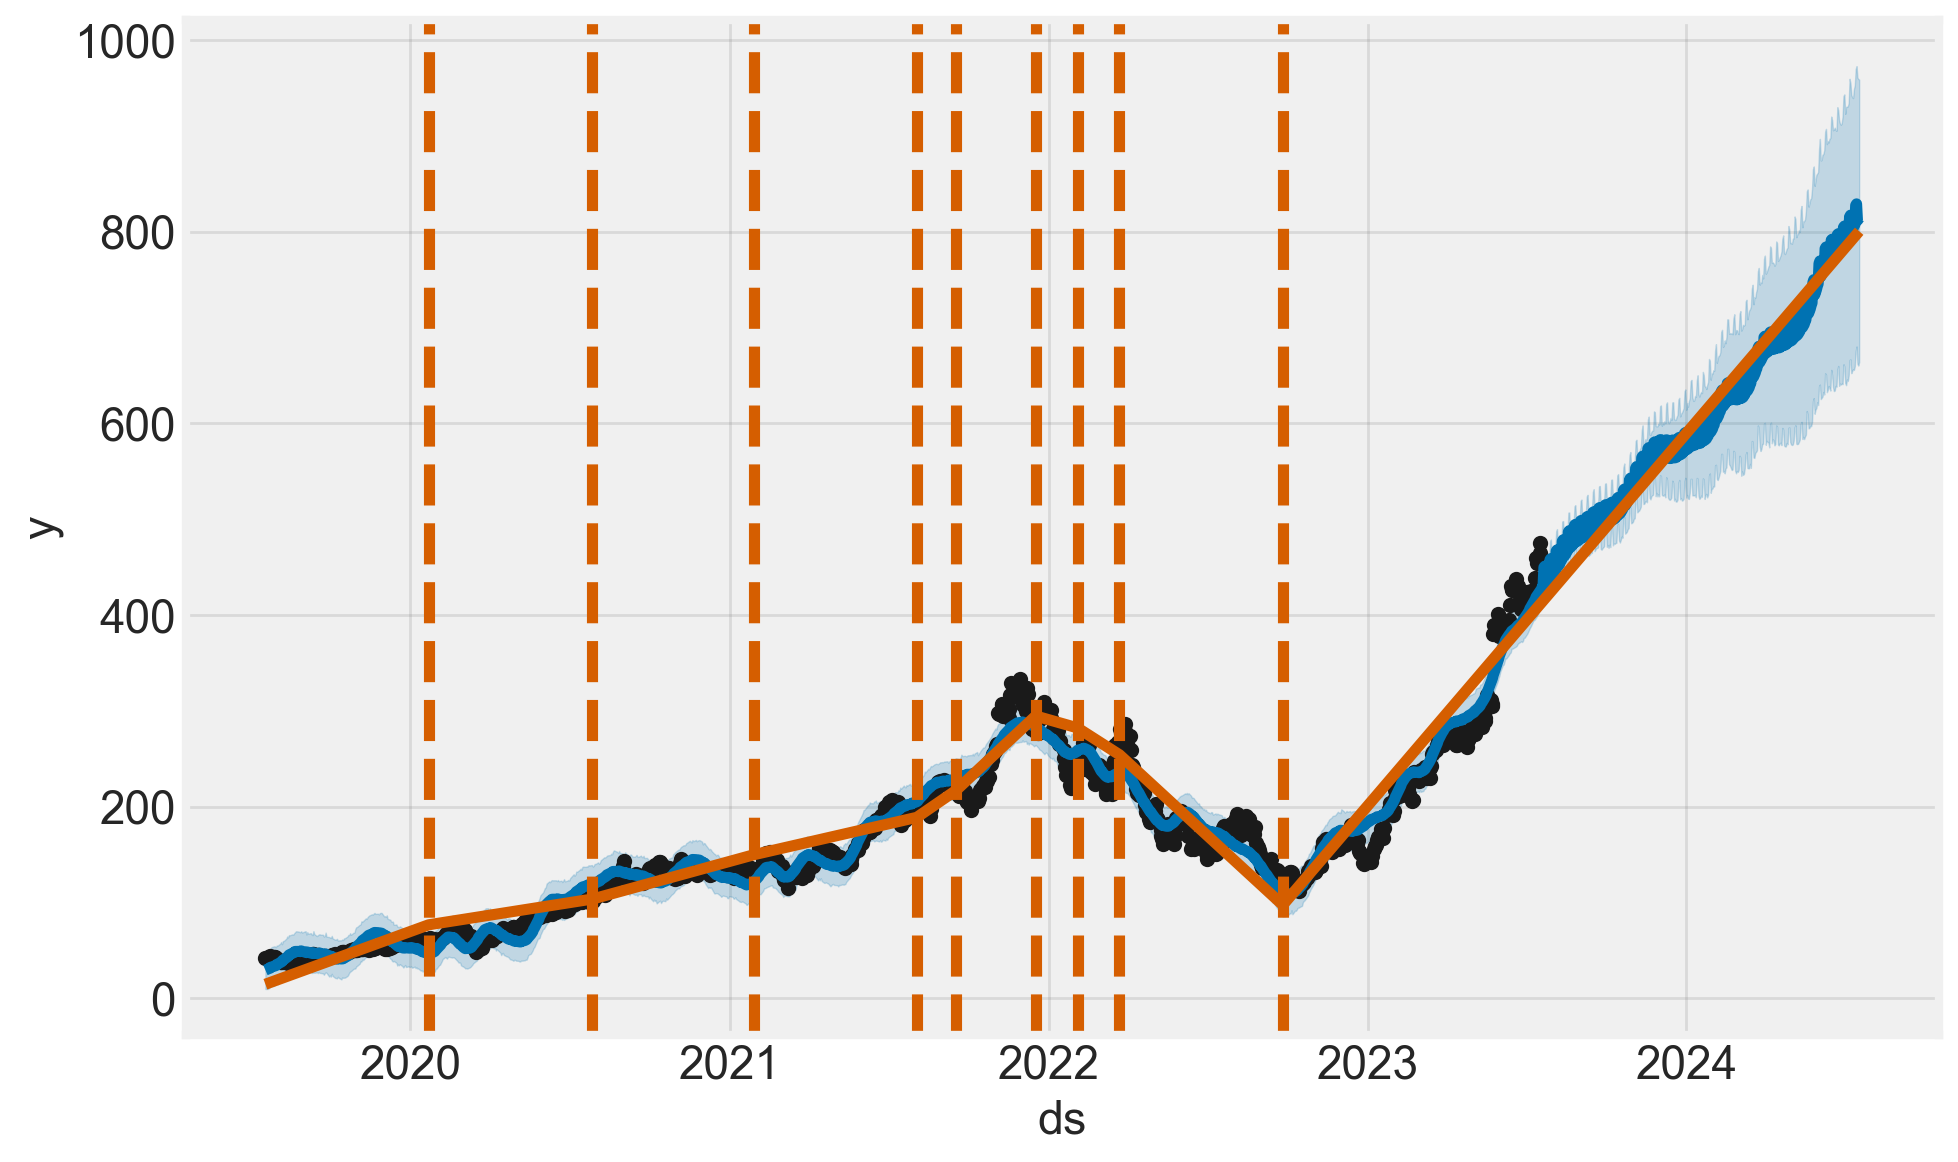

In [61]:
#Add changepoints to the plot

fig=model.plot(prediction)
prophet=Prophet(changepoint_range=0.9)
a=add_changepoints_to_plot(fig.gca(), model, prediction)

We can also look up the exact dates that were identified as changepoints using the changepoints
method of a fitted Prophet model.

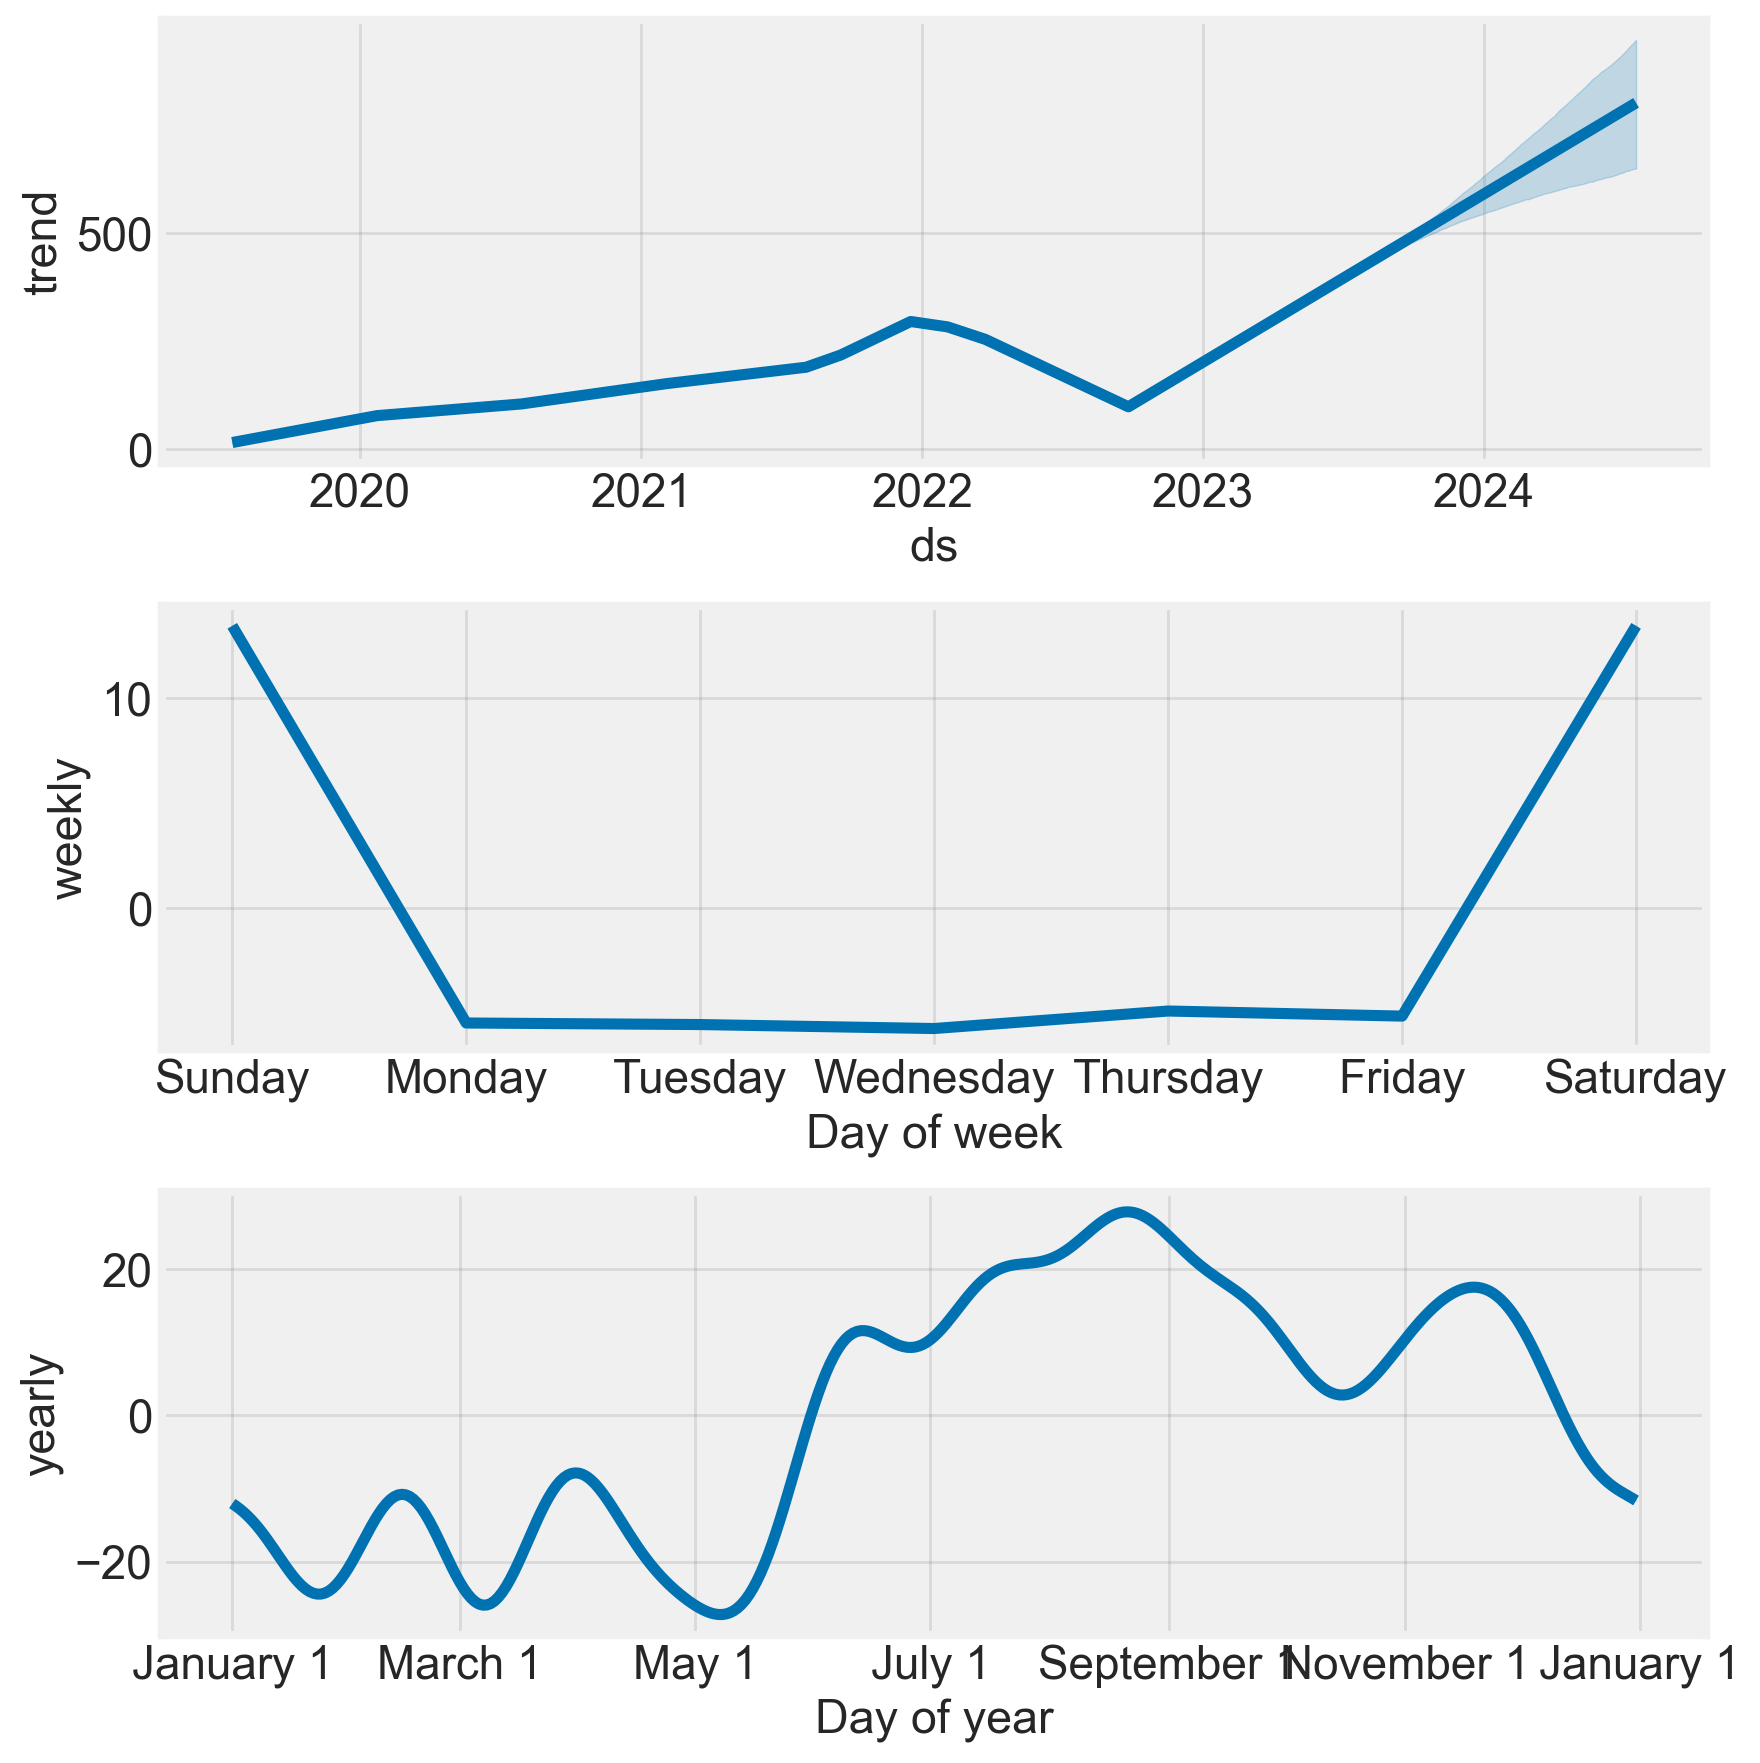

In [65]:
#Inspect the decomposition of the time series

fig2=model.plot_components(prediction)

In [80]:
from prophet.plot import plot_components_plotly
fig2=plot_components_plotly(model, prediction)

In [81]:
fig2

In order to properly evaluate the model’s performance (and potentially tune its hyperparameters), we
do need a validation framework. Prophet implements the already familiar walk-forward cross-validation
in its cross_validation function.

In [ ]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model, initial='730 days', period= '180 days', horizon= '365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

18:56:29 - cmdstanpy - INFO - Chain [1] start processing
18:56:29 - cmdstanpy - INFO - Chain [1] done processing
18:56:29 - cmdstanpy - INFO - Chain [1] start processing
18:56:29 - cmdstanpy - INFO - Chain [1] done processing
18:56:30 - cmdstanpy - INFO - Chain [1] start processing
18:56:30 - cmdstanpy - INFO - Chain [1] done processing


We have specified that we want:

• The initial window to contain 5 years of data (a year contains approximately 252 trading days)
• A forecast horizon of 365 days
• The forecasts to be calculated every 365 days

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-26,198.513277,192.566218,204.468893,192.649506,2021-07-23
1,2021-07-27,198.897082,193.064044,205.044010,191.790833,2021-07-23
2,2021-07-28,199.276812,193.511663,205.573244,194.736343,2021-07-23
3,2021-07-29,199.559676,193.349925,205.597351,196.323975,2021-07-23
4,2021-07-30,200.326545,194.846334,206.500979,194.696442,2021-07-23


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
748,2023-07-12,-56.476917,-167.198976,47.437717,439.019989,2022-07-18
749,2023-07-13,-57.054583,-176.333004,46.251619,459.769989,2022-07-18
750,2023-07-14,-57.645325,-176.495691,48.728852,454.690002,2022-07-18
751,2023-07-17,-60.236670,-176.293113,44.443915,464.609985,2022-07-18
752,2023-07-18,-60.906787,-178.297157,45.336346,474.940002,2022-07-18


In [ ]:
#Calculate the aggregated performance metrics:

from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2338.998156,48.363190,39.399500,0.184616,0.219262,0.180880,0.186667
1,37 days,2398.034444,48.969730,39.958712,0.187276,0.217164,0.183478,0.186667
2,38 days,2389.566656,48.883194,39.784457,0.186811,0.221844,0.183532,0.193333
3,39 days,2390.997258,48.897825,39.745365,0.186811,0.221844,0.183613,0.200000
4,40 days,2441.240726,49.408913,40.139019,0.188022,0.222170,0.184401,0.206667
...,...,...,...,...,...,...,...,...
325,361 days,125706.139853,354.550617,331.580786,1.464525,1.126814,1.263371,0.000000
326,362 days,124136.066970,352.329486,328.663643,1.455632,1.126779,1.251530,0.000000
327,363 days,122711.007490,350.301310,326.331911,1.457701,1.126814,1.234707,0.000000
328,364 days,124180.217275,352.392136,328.388463,1.469412,1.128206,1.229733,0.000000


We plot the MAPE  (Mean Absolute Percentage Error) Score.  

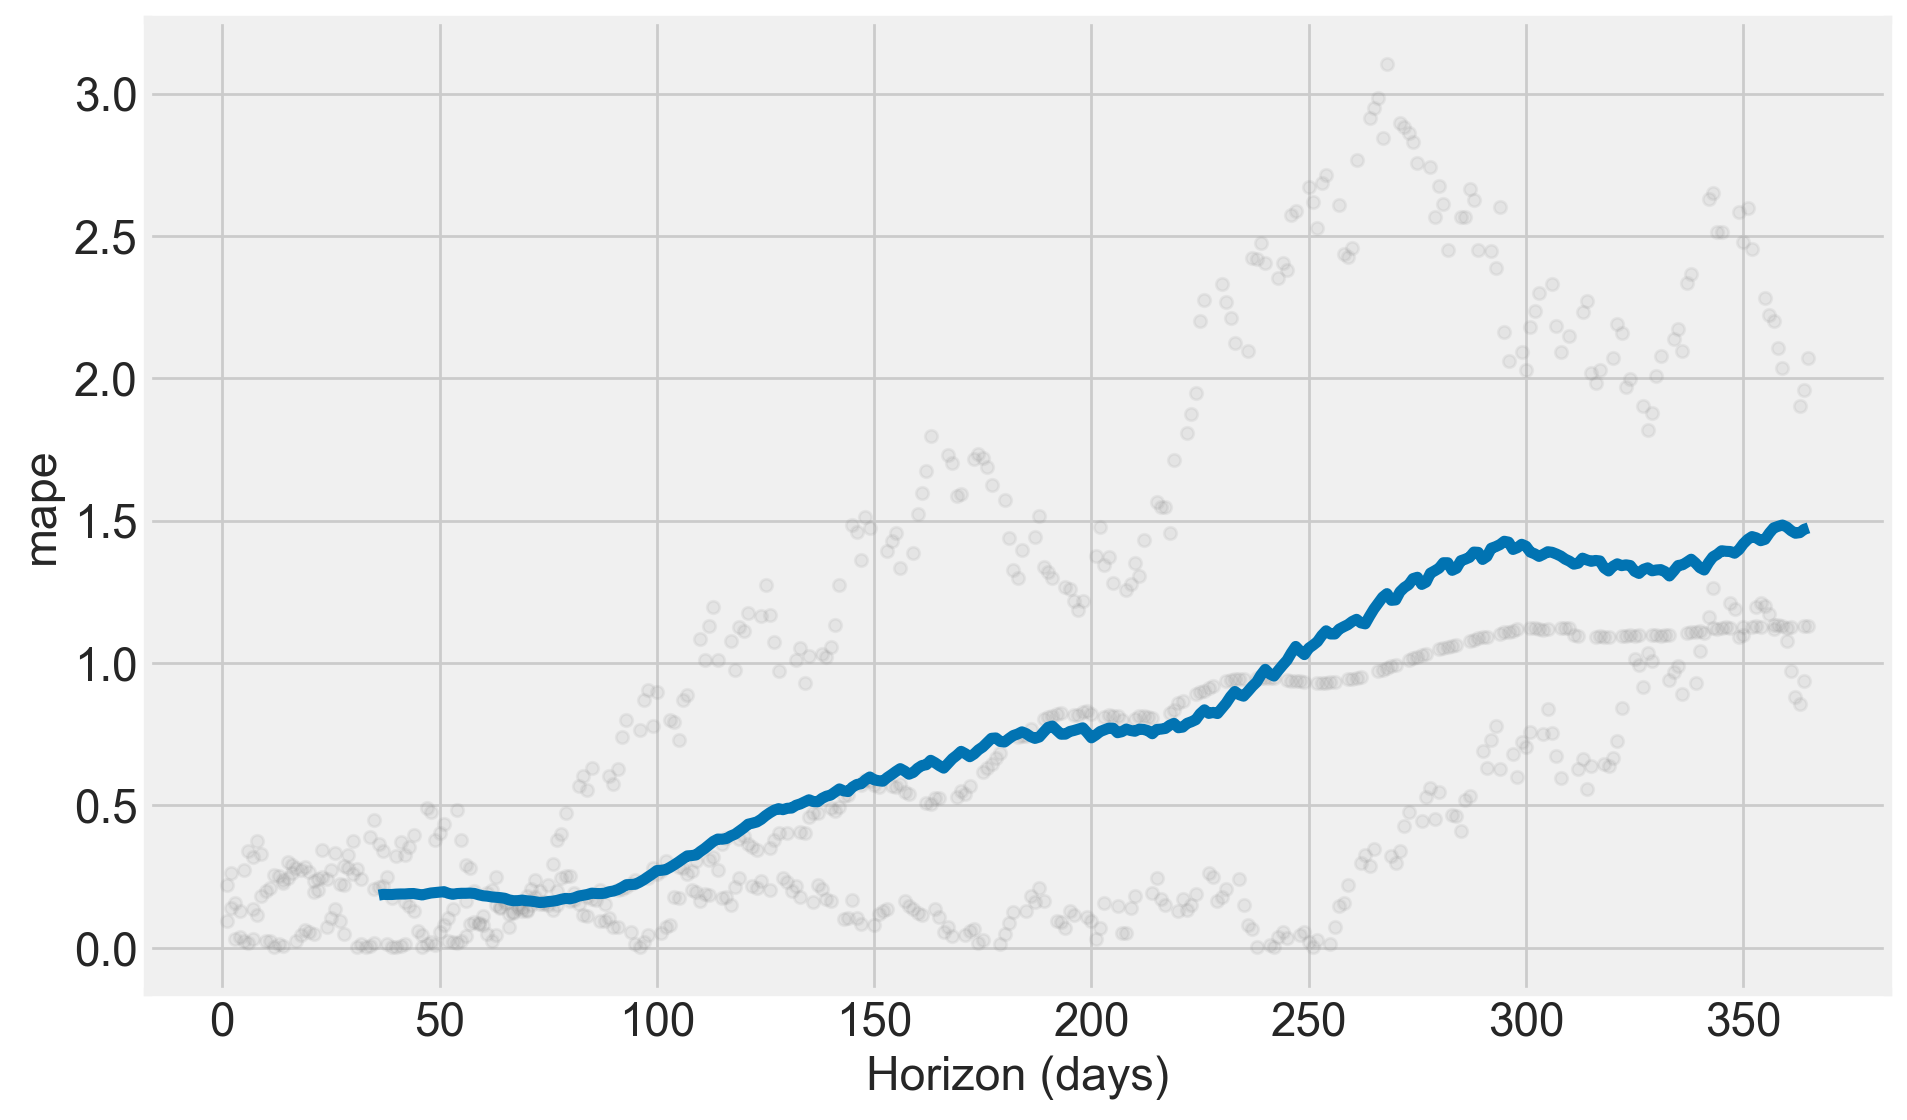

In [ ]:
from prophet import plot
fig2=plot.plot_cross_validation_metric(df_cv, metric='mape')

The dots in Figure represent the absolute percent error for each prediction in the cross-validation
DataFrame. The blue line represents the MAPE. The average is taken over a rolling window of the dots.